<a href="https://colab.research.google.com/github/JColeman1550/BASEBALL.github.io/blob/main/Bobby_Witt_Spray_Charts_ALL_BATTED_BALLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install pybaseball -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.2/350.2 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 30.9 MB/s eta 0:00:00


In [3]:
#load packages
import pybaseball as pyb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from flask import Flask, render_template, request

In [ ]:
#load/plot stadium data
stadium = pd.read_csv('https://raw.githubusercontent.com/jldbc/pybaseball/master/pybaseball/data/mlbstadiums.csv')

stadium['y'] = stadium['y'] * -1
stadium = stadium.loc[:,'team':]

stadium

In [5]:
def plot_stadium(team, color):

    team_df = stadium[stadium['team'] == team.lower()]
    for i in stadium['segment'].unique():
        data = team_df[team_df['segment'] == i]
        plt.plot(data['x'],data['y'], linestyle = '-', color = color)
    plt.suptitle(team.capitalize(), y=1.01, fontsize=15)
    plt.title(team_df['location'].any(), fontsize=10)
    plt.axis('on');

Gathering Player Data


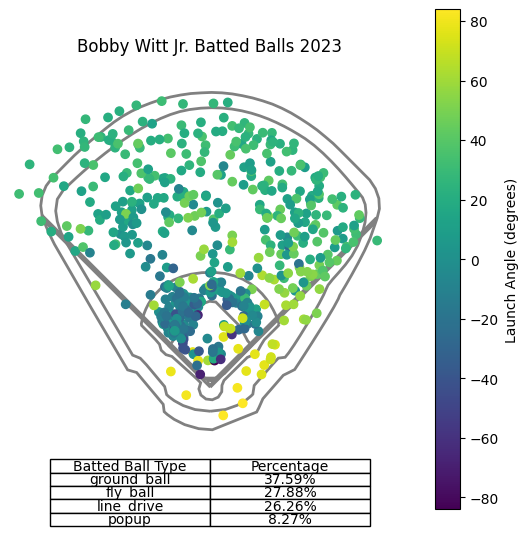

In [6]:
#Witt Overall

# start and end dates
start_date = '2023-01-01'
end_date = '2023-12-31'

# Get statcast data for Witt using playerID
df = pyb.statcast_batter(start_date, end_date, 677951)

# Defining a list of batted ball types (bb_type)
bb_types = ['ground_ball', 'line_drive', 'fly_ball', 'popup']

# only rows with bb_type in bip_bb_types
bip_df = df[df['bb_type'].isin(bb_types)]

# color scale based on launch angle
color_palette = sns.color_palette("viridis", as_cmap=True)

# stadium outline
pyb.plotting.plot_stadium('royals', 'blue')

# spray chart of batted balls with color differentiation based on launch angle
plt.scatter(bip_df['hc_x'], -bip_df['hc_y'], c=bip_df['launch_angle'], cmap=color_palette, marker='o')

# chart labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Bobby Witt Jr. Batted Balls 2023')

# table with batted ball type percentages
bb_type_counts = bip_df['bb_type'].value_counts(normalize=True) * 100
table_data = [['Batted Ball Type', 'Percentage']]
table_data.extend([[bb_type, f'{percentage:.2f}%'] for bb_type, percentage in bb_type_counts.items()])

# colorbar for launch angle
cbar = plt.colorbar()
cbar.set_label('Launch Angle (degrees)')

# table
table = plt.table(cellText=table_data, loc='bottom', colWidths=[0.4, 0.4], cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

Gathering Player Data


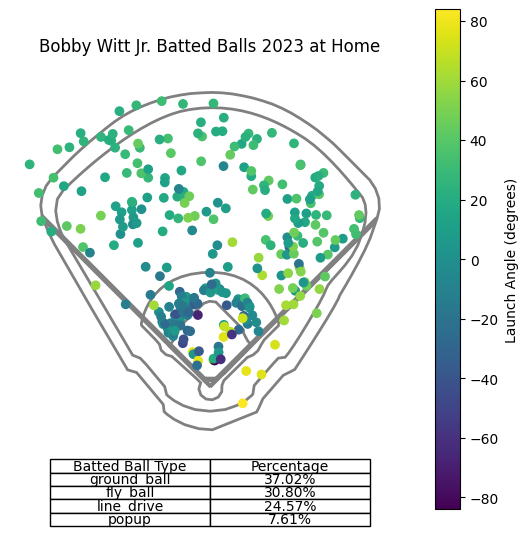

In [7]:

start_date = '2023-01-01'
end_date = '2023-12-31'


df = pyb.statcast_batter(start_date, end_date, 677951)


home_df = df[df['home_team'] == 'KC']


bb_types = ['ground_ball', 'line_drive', 'fly_ball', 'popup']


bip_df = home_df[home_df['bb_type'].isin(bb_types)]


color_palette = sns.color_palette("viridis", as_cmap=True)


pyb.plotting.plot_stadium('royals', 'blue')


plt.scatter(bip_df['hc_x'], -bip_df['hc_y'], c=bip_df['launch_angle'], cmap=color_palette, marker='o')


plt.xlabel('')
plt.ylabel('')
plt.title('Bobby Witt Jr. Batted Balls 2023 at Home')


bb_type_counts = bip_df['bb_type'].value_counts(normalize=True) * 100
table_data = [['Batted Ball Type', 'Percentage']]
table_data.extend([[bb_type, f'{percentage:.2f}%'] for bb_type, percentage in bb_type_counts.items()])


cbar = plt.colorbar()
cbar.set_label('Launch Angle (degrees)')


table = plt.table(cellText=table_data, loc='bottom', colWidths=[0.4, 0.4], cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)




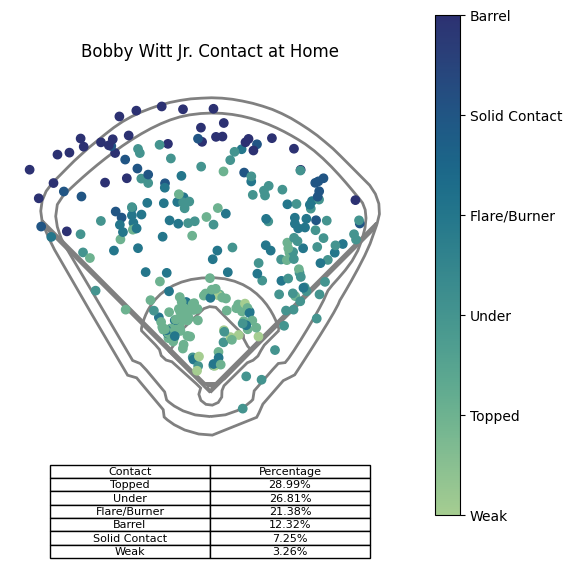

In [19]:

color_palette_1 = sns.color_palette("crest", as_cmap=True)


pyb.plotting.plot_stadium('royals', 'blue')


scatter = plt.scatter(home_df['hc_x'], -home_df['hc_y'], c=home_df['launch_speed_angle'], cmap=color_palette_1, marker='o')


plt.xlabel('')
plt.ylabel('')
plt.title('Bobby Witt Jr. Contact at Home')



batted_ball_labels = {1: 'Weak', 2: 'Topped', 3: 'Under', 4: 'Flare/Burner', 5: 'Solid Contact', 6: 'Barrel'}


cbar = plt.colorbar(scatter, ticks=range(1, 7), orientation='vertical')
cbar.set_label(None)
cbar.set_ticklabels(list(batted_ball_labels.values()))


bb_type_counts = home_df['launch_speed_angle'].value_counts(normalize=True) * 100
table_data = [['Contact', 'Percentage']]
table_data.extend([[batted_ball_labels[launch_speed_angle], f'{percentage:.2f}%'] for launch_speed_angle, percentage in bb_type_counts.items()])


table = plt.table(cellText=table_data, loc='bottom', colWidths=[0.4, 0.4], cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
plt.show()